In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)  # to join lattitudes and longitudes as a tuple that have the same index, and can be accessed wit 0,1
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
import requests
# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [8]:
# Get the weather data for each city for the website.
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
#for i in range(len(cities)):

#    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | nurota
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | jinka
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | springville
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | saleaula
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | eastbourne
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | bardiyah
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | palmer
Processing Record 21 of Set 1 | galiwinku
City not found. Sk

Processing Record 41 of Set 4 | west bay
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | beloha
Processing Record 46 of Set 4 | udomlya
Processing Record 47 of Set 4 | port shepstone
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | namibe
Processing Record 50 of Set 4 | tigre
Processing Record 1 of Set 5 | marawi
Processing Record 2 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 5 | oktyabrskiy
Processing Record 4 of Set 5 | kamaishi
Processing Record 5 of Set 5 | baruun-urt
Processing Record 6 of Set 5 | arlit
Processing Record 7 of Set 5 | dali
Processing Record 8 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 9 of Set 5 | soyo
Processing Record 10 of Set 5 | dourbali
Processing Record 11 of Set 5 | khorramabad
Processing Record 12 of Set 5 | yuanping
Processing Record 13 of Set 5 | adrar
Proces

Processing Record 28 of Set 8 | hendek
Processing Record 29 of Set 8 | west wendover
Processing Record 30 of Set 8 | novyy urengoy
Processing Record 31 of Set 8 | tokonou
Processing Record 32 of Set 8 | roald
Processing Record 33 of Set 8 | bargal
City not found. Skipping...
Processing Record 34 of Set 8 | abnub
Processing Record 35 of Set 8 | gamboma
Processing Record 36 of Set 8 | schrobenhausen
Processing Record 37 of Set 8 | ocos
Processing Record 38 of Set 8 | porto novo
Processing Record 39 of Set 8 | taguatinga
Processing Record 40 of Set 8 | gamba
Processing Record 41 of Set 8 | carson city
Processing Record 42 of Set 8 | chernyshevskiy
Processing Record 43 of Set 8 | klaksvik
Processing Record 44 of Set 8 | andra
Processing Record 45 of Set 8 | diu
Processing Record 46 of Set 8 | puerto narino
Processing Record 47 of Set 8 | najran
Processing Record 48 of Set 8 | merauke
Processing Record 49 of Set 8 | takoradi
Processing Record 50 of Set 8 | moses lake
Processing Record 1 of 

Processing Record 14 of Set 12 | mount pleasant
Processing Record 15 of Set 12 | suntar
Processing Record 16 of Set 12 | tungi
Processing Record 17 of Set 12 | bocas del toro
Processing Record 18 of Set 12 | oranjestad
Processing Record 19 of Set 12 | havoysund
Processing Record 20 of Set 12 | faanui
Processing Record 21 of Set 12 | celestun
Processing Record 22 of Set 12 | makakilo city
Processing Record 23 of Set 12 | majene
Processing Record 24 of Set 12 | dubti
Processing Record 25 of Set 12 | anzio
Processing Record 26 of Set 12 | porto seguro
Processing Record 27 of Set 12 | uddevalla
Processing Record 28 of Set 12 | quatre cocos
Processing Record 29 of Set 12 | beyneu
Processing Record 30 of Set 12 | mbala
Processing Record 31 of Set 12 | uige
Processing Record 32 of Set 12 | oxelosund
Processing Record 33 of Set 12 | valle de juarez
Processing Record 34 of Set 12 | bilma
Processing Record 35 of Set 12 | kletnya
Processing Record 36 of Set 12 | talnakh
Processing Record 37 of Se

In [10]:
len(city_data)

560

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,39.22,87,90,17.27,US,2021-09-07 19:31:26
1,Mar Del Plata,-38.0023,-57.5575,53.62,94,75,20.71,AR,2021-09-07 19:27:42
2,Hasaki,35.7333,140.8333,61.20,62,100,5.48,JP,2021-09-07 19:31:26
3,Nurota,40.5614,65.6886,75.29,19,0,7.40,UZ,2021-09-07 19:31:26
4,Vila Velha,-20.3297,-40.2925,75.15,83,75,10.36,BR,2021-09-07 19:31:27
5,Hermanus,-34.4187,19.2345,53.91,80,1,7.36,ZA,2021-09-07 19:31:27
6,Jinka,5.6500,36.6500,67.71,70,80,3.36,ET,2021-09-07 19:31:27
7,Punta Arenas,-53.1500,-70.9167,55.51,38,0,9.22,CL,2021-09-07 19:28:49
8,Springville,40.1652,-111.6107,94.57,25,1,5.75,US,2021-09-07 19:31:28
9,Rikitea,-23.1203,-134.9692,72.70,78,18,11.41,PF,2021-09-07 19:28:33


In [12]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-09-07 19:31:26,71.2906,-156.7887,39.22,87,90,17.27
1,Mar Del Plata,AR,2021-09-07 19:27:42,-38.0023,-57.5575,53.62,94,75,20.71
2,Hasaki,JP,2021-09-07 19:31:26,35.7333,140.8333,61.20,62,100,5.48
3,Nurota,UZ,2021-09-07 19:31:26,40.5614,65.6886,75.29,19,0,7.40
4,Vila Velha,BR,2021-09-07 19:31:27,-20.3297,-40.2925,75.15,83,75,10.36
5,Hermanus,ZA,2021-09-07 19:31:27,-34.4187,19.2345,53.91,80,1,7.36
6,Jinka,ET,2021-09-07 19:31:27,5.6500,36.6500,67.71,70,80,3.36
7,Punta Arenas,CL,2021-09-07 19:28:49,-53.1500,-70.9167,55.51,38,0,9.22
8,Springville,US,2021-09-07 19:31:28,40.1652,-111.6107,94.57,25,1,5.75
9,Rikitea,PF,2021-09-07 19:28:33,-23.1203,-134.9692,72.70,78,18,11.41


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
## Visualizations:
# let's see how temperature. humidity, cloudiness and wind speed vary with latitude
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import time module -> to get current day in seconds from 01/01/1970
import time

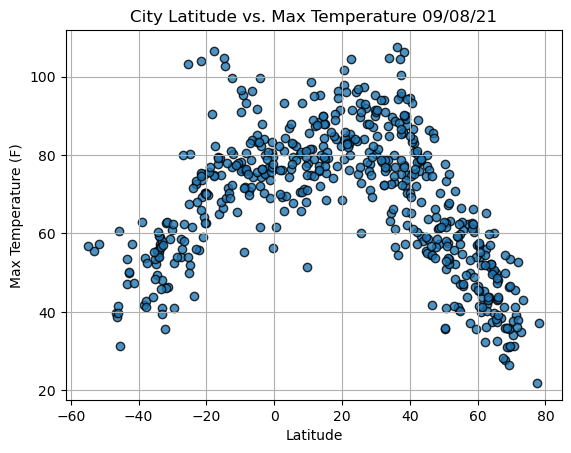

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x")) #strftime formats the current day in standard format
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

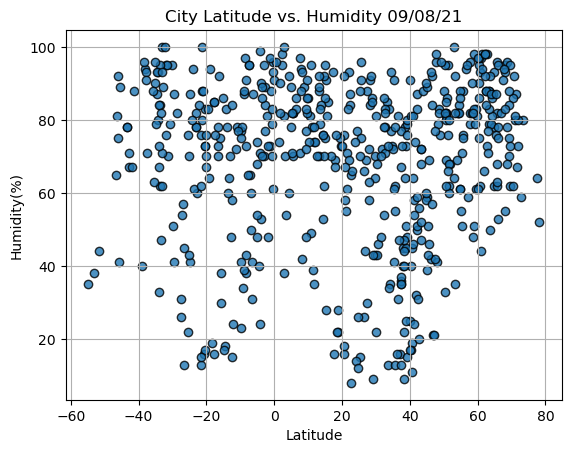

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x")) #strftime formats the current day in standard format
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

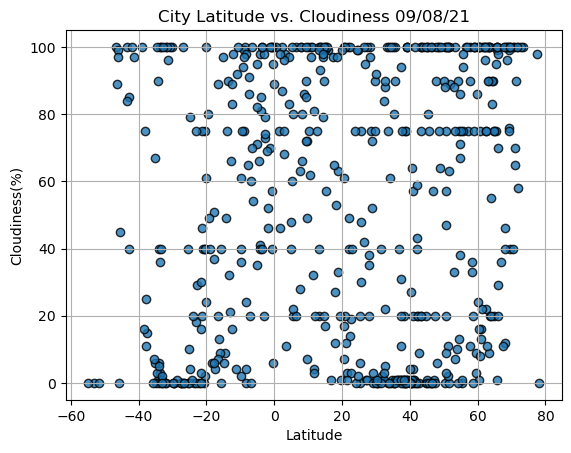

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x")) #strftime formats the current day in standard format
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

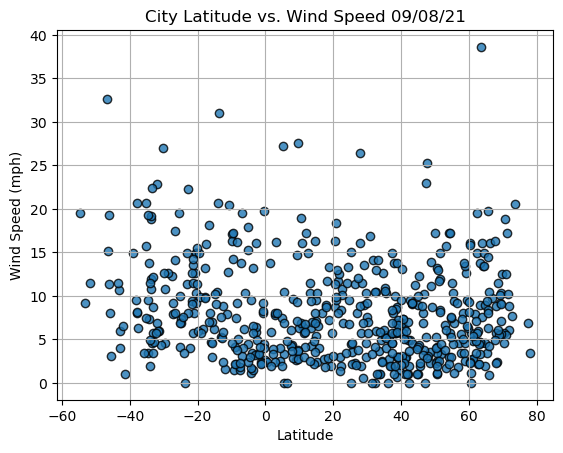

In [27]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x")) #strftime formats the current day in standard format
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [28]:
# practicing linear regression for finding correlation between two variables
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

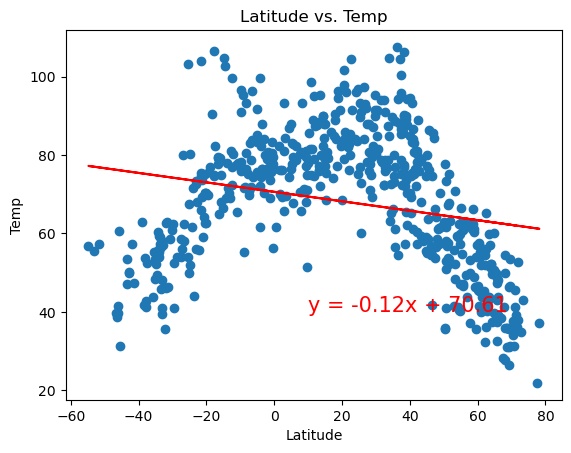

In [32]:
# Perform linear regression. # Linear regression between latitude and the weather variables
x_values = lats
y_values = max_temps
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title('Latitude vs. Temp')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [43]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"The p-value is: {p_value:.3f}")
    print(f"The r-value is: {r_value:.3f}")
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [44]:
# before to call the plot_linear)regression function, lets separate latitudes of the Northern and Southern Hemispheres
# we need to separate them from the df, Northern hemisphere has positive latitudes.
# we filter the rows of city_data_df based on latitude column and using loc for accessing them
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-09-07 19:31:26,71.2906,-156.7887,39.22,87,90,17.27
2,Hasaki,JP,2021-09-07 19:31:26,35.7333,140.8333,61.20,62,100,5.48
3,Nurota,UZ,2021-09-07 19:31:26,40.5614,65.6886,75.29,19,0,7.40
6,Jinka,ET,2021-09-07 19:31:27,5.6500,36.6500,67.71,70,80,3.36
8,Springville,US,2021-09-07 19:31:28,40.1652,-111.6107,94.57,25,1,5.75
10,Hilo,US,2021-09-07 19:28:53,19.7297,-155.0900,82.27,73,1,5.75
12,Eastbourne,GB,2021-09-07 19:31:28,50.7687,0.2845,73.31,69,20,1.01
13,Ribeira Grande,PT,2021-09-07 19:29:20,38.5167,-28.7000,72.00,78,75,6.91
14,Bardiyah,LY,2021-09-07 19:31:29,31.7561,25.0865,78.19,72,2,14.09
15,Chokurdakh,RU,2021-09-07 19:31:29,70.6333,147.9167,31.23,92,100,18.79


In [45]:
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Mar Del Plata,AR,2021-09-07 19:27:42,-38.0023,-57.5575,53.62,94,75,20.71
4,Vila Velha,BR,2021-09-07 19:31:27,-20.3297,-40.2925,75.15,83,75,10.36
5,Hermanus,ZA,2021-09-07 19:31:27,-34.4187,19.2345,53.91,80,1,7.36
7,Punta Arenas,CL,2021-09-07 19:28:49,-53.1500,-70.9167,55.51,38,0,9.22
9,Rikitea,PF,2021-09-07 19:28:33,-23.1203,-134.9692,72.70,78,18,11.41
11,Busselton,AU,2021-09-07 19:31:28,-33.6500,115.3333,59.09,84,36,10.85
16,Mount Isa,AU,2021-09-07 19:30:33,-20.7333,139.5000,64.17,16,0,12.66
20,Ushuaia,AR,2021-09-07 19:31:30,-54.8000,-68.3000,56.86,35,0,19.57
22,Lebu,CL,2021-09-07 19:31:31,-37.6167,-73.6500,52.47,71,15,6.35
23,New Norfolk,AU,2021-09-07 19:28:44,-42.7826,147.0587,49.91,71,85,4.00


The p-value is: 0.000
The r-value is: -0.743


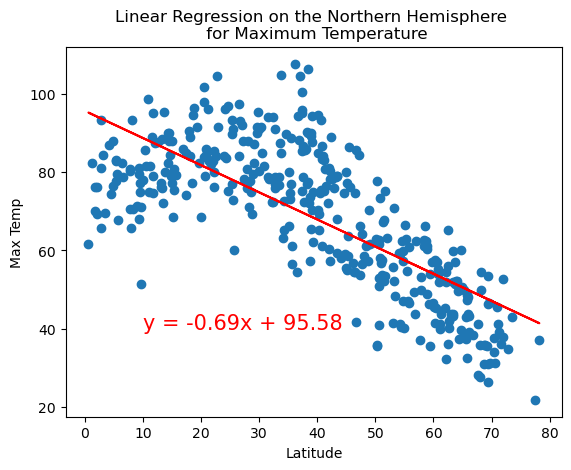

In [46]:
# TEMPERATURE: Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

The p-value is: 0.000
The r-value is: 0.719


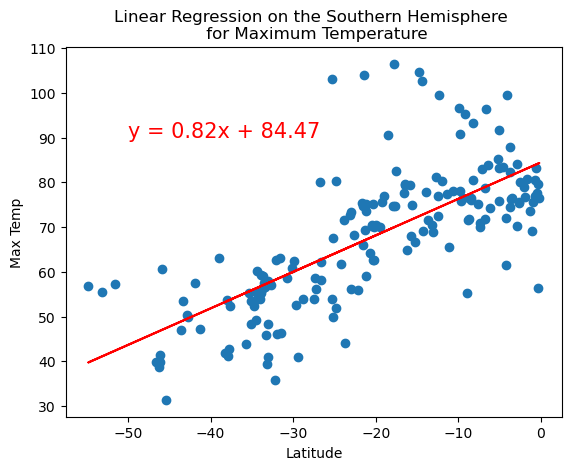

In [47]:
# TEMPERATURE: Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

The p-value is: 0.023
The r-value is: 0.116


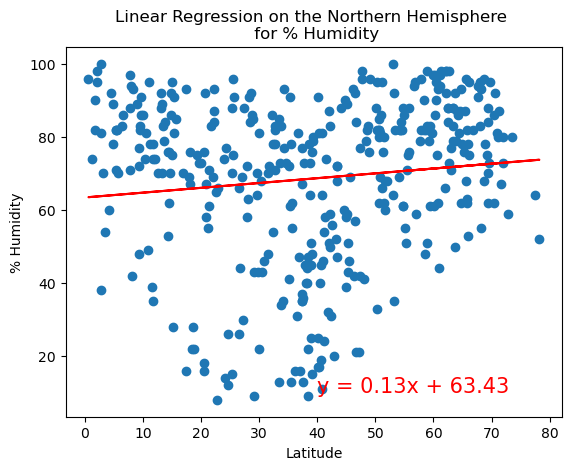

In [52]:
# HUMIDITY: Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

The p-value is: 0.641
The r-value is: -0.035


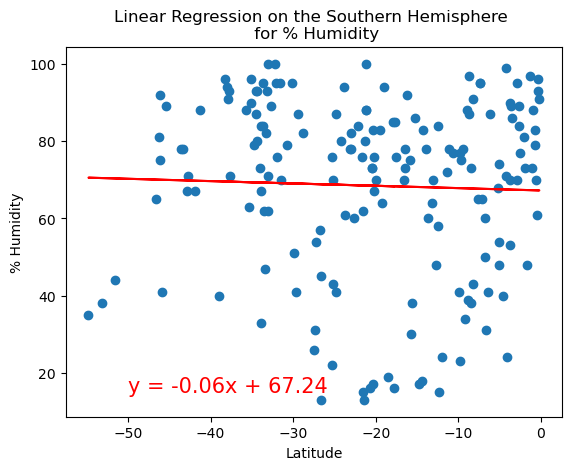

In [51]:
# HUMIDITY: Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

The p-value is: 0.385
The r-value is: 0.044


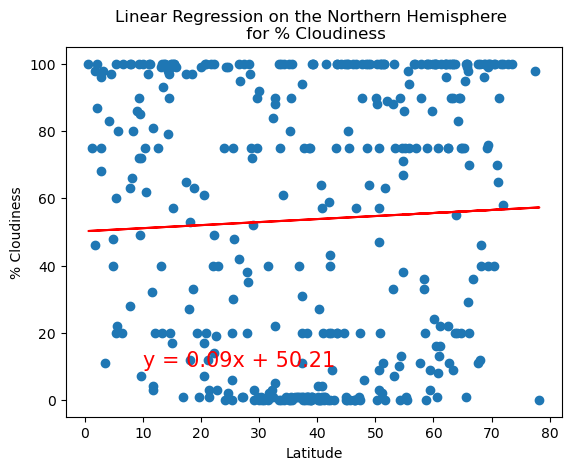

In [56]:
# CLOUDINESS: Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,10))

The p-value is: 0.002
The r-value is: 0.233


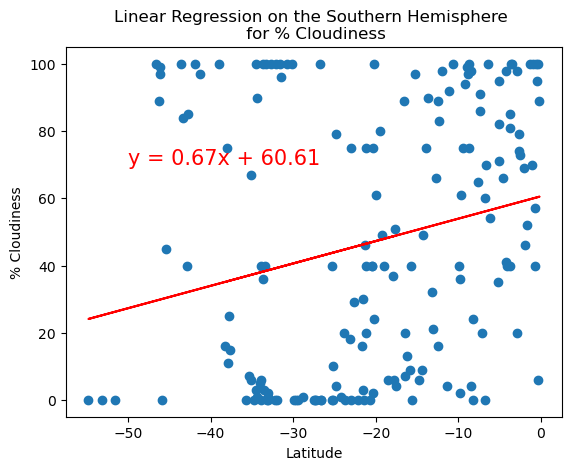

In [58]:
# CLOUDINESS: Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,70))

The p-value is: 0.268
The r-value is: 0.057


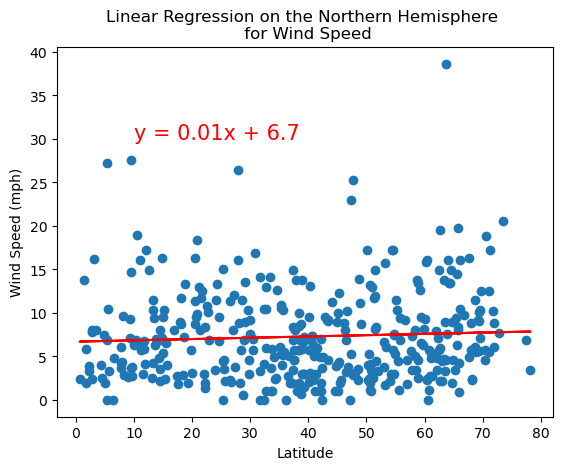

In [60]:
# WIND SPEED: Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(10,30))

The p-value is: 0.001
The r-value is: -0.259


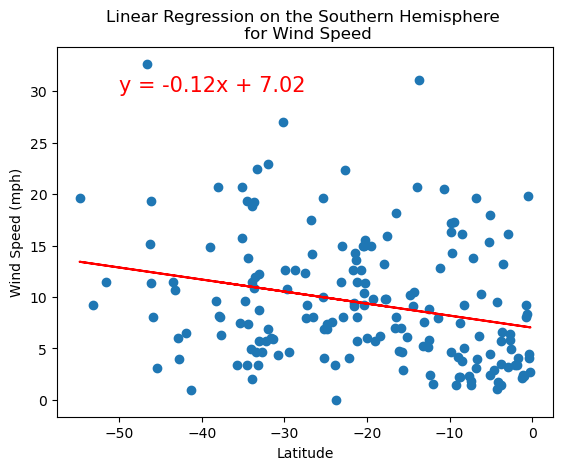

In [62]:
# WIND SPEED: Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,30))